<a href="https://colab.research.google.com/github/ShreyanshJoshi/COVID-19-Global-Forecasting-Week/blob/master/EDA_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19  Global Forecasting Week (3)**- Kaggle

### What is Coronavirus ? 
Coronavirus are a type of virus. A newly identified coronavirus, SARS-CoV-2, has caused a worldwide pandemic of respiratory illness, called COVID-19.
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. 
At time of writing, it has affected 6.2 million people worldwide, claiming the lives of more than 375,000 people.
#### Spread - 
The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes. However, reports suggest that the virus is capable of surviving onto some surface for upto 6 hrs and hence may get transferred if a healthy person comes in contact with that surface.

#### Symptoms -
Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory diseases are more likely to develop serious illness.

In case you do not suffer from any such morbidity (and are young) then avoid getting hospitalised unless symptoms are severe. Doing so, will reduce burden on the healthcare system of a country. In majority of the cases, people can recover by quarantining themselves at home and taking the required medications.

#### Prevention -
* Best way to deal with such a contagious disease is not to get infected. This not only saves money, but also slows the spread of this deadly virus.
* Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

* Avoid venturing out of your home unless absolutely essential and whenever you do, make sure that you wear a face mask (preferably N95) and avoid coming in contact with people or things.

#### Technical Developments - 
At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO is the body who is primarily incharge of dealing with the virus.

The COVID-19 pandemic is the defining global health crisis of our time and the greatest global humanitarian challenge the world has faced since World War II. Its time the world comes together to solve this crisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers,utils,regularizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D, Input
from keras.layers import Conv2D, Activation,MaxPooling2D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid-19/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid-19/test.csv')
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid-19/submission.csv')

In [4]:
train_cpy = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid-19/train.csv',parse_dates=["Date"], index_col='Date')
train_cpy.head()

# Basically, now we parse the dataframe using dates and not using the index number as before in train/test

,Id,Province_State,Country_Region,ConfirmedCases,Fatalities
Date,,,,,
2020-01-22,1,NaN,Afghanistan,0.0,0.0
2020-01-23,2,NaN,Afghanistan,0.0,0.0
2020-01-24,3,NaN,Afghanistan,0.0,0.0
2020-01-25,4,NaN,Afghanistan,0.0,0.0
2020-01-26,5,NaN,Afghanistan,0.0,0.0


Under the hood, `pandas` plots graphs with the `matplotlib` library. This is usually pretty convenient since it allows you to just `.plot` your graphs

* If no x is specified, it takes the 0th column( by which dataset is being parsed) on x axis.
* If no y is specified, it plots against all columns

### Worldover Analysis

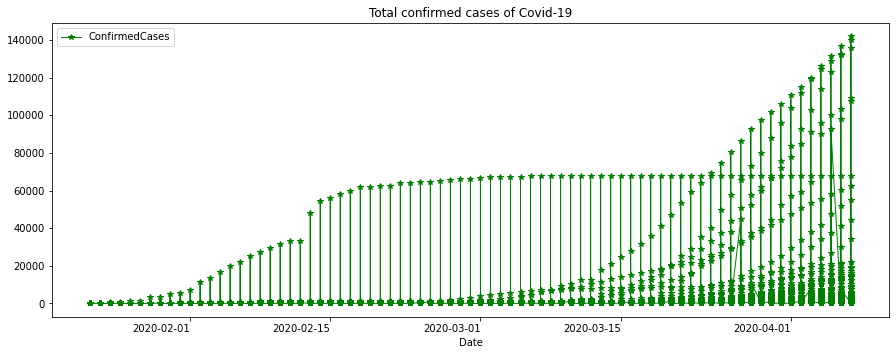

In [5]:
# Equivalent to train_cpy.plot['ConfirmedCases'].plot(....)

train_cpy.plot(y = 'ConfirmedCases', figsize = (15,6), marker = "*", color = 'green', linewidth =1)
plt.title("Total confirmed cases of Covid-19")
plt.xticks(rotation=0)
plt.show()

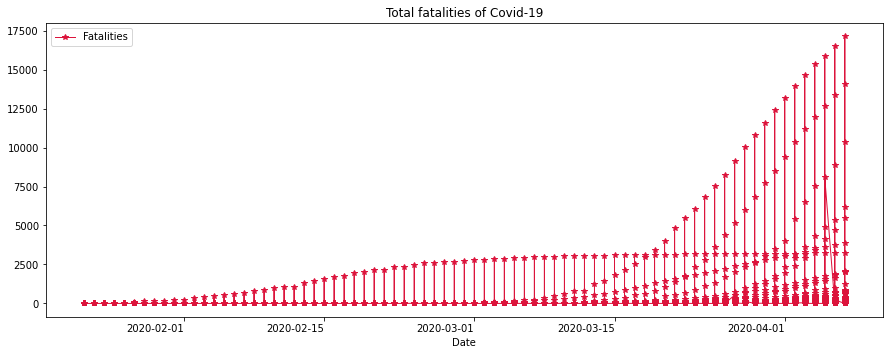

In [6]:
train_cpy.plot(y = 'Fatalities', figsize = (15,6), marker = "*", color = 'crimson', linewidth =1)
plt.title("Total fatalities of Covid-19")
plt.xticks(rotation=0)
plt.show()

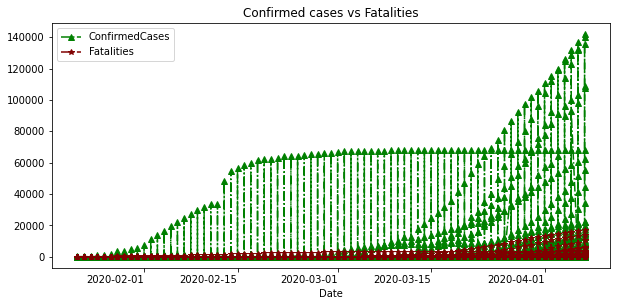

In [7]:
train_cpy['ConfirmedCases'].plot(figsize = (10,5),marker="^", color = 'green', linestyle = 'dashdot',  title = "Total Confirmed Cases")
train_cpy['Fatalities'].plot(figsize = (10,5),marker="*", color = 'maroon',linestyle = 'dashdot',title = "Total Fatalities")
plt.xlabel('Date')
plt.title('Confirmed cases vs Fatalities')
plt.legend()
plt.xticks(rotation=0)
plt.show()

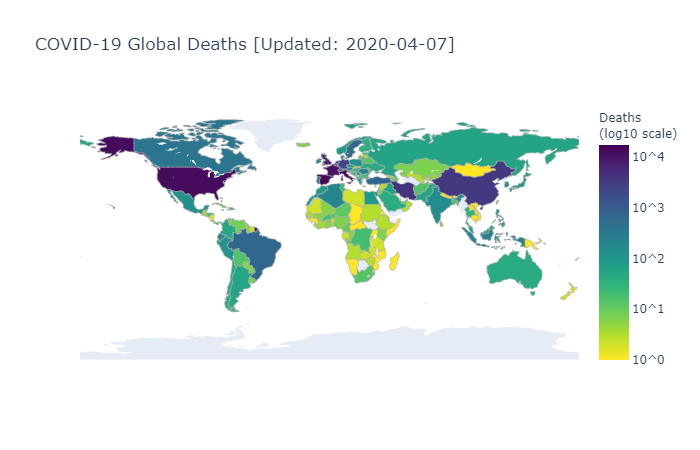

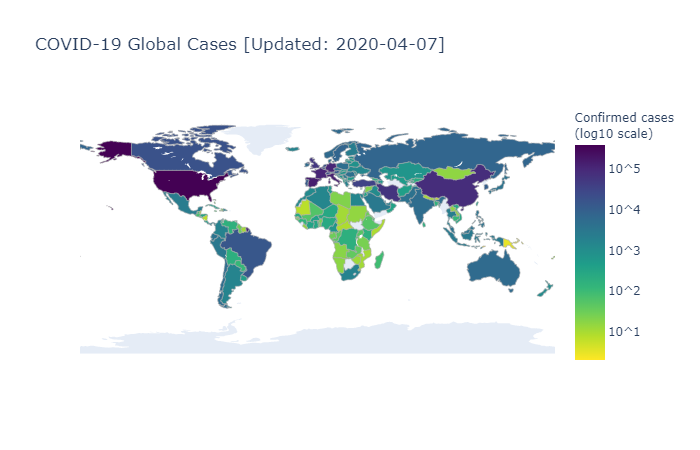

In [8]:
# These images are to give the reader a general idea about the Covid situation 
# in the world by 1st week of April

from IPython.display import Image, display
display(Image('/content/drive/My Drive/Colab Notebooks/newplot (1).png'))
display(Image('/content/drive/My Drive/Colab Notebooks/newplot.png'))

In [0]:
train.rename(columns={'Country_Region':'Country'}, inplace=True)
test.rename(columns={'Country_Region':'Country'}, inplace=True)

train.rename(columns={'Province_State':'State'}, inplace=True)
test.rename(columns={'Province_State':'State'}, inplace=True)

In [0]:
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)
test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

# Pandas 'to_datetime()' method helps to convert string Date time (as it is when csv file is read) into Python Date time object.

In [11]:
train.tail()

,Id,State,Country,Date,ConfirmedCases,Fatalities
23557,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23558,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23559,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23560,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0
23561,32712,NaN,Zimbabwe,2020-04-07,11.0,2.0


In [12]:
test.head()

,ForecastId,State,Country,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [13]:
submission.head()           # Thus, we have to predict both Confirmed Cases as well as Fatalities

# So, either multi-output model or sequentially predict both

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


## **EDA (Exploratory Data Analysis)**

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              23562 non-null  int64         
 1   State           10010 non-null  object        
 2   Country         23562 non-null  object        
 3   Date            23562 non-null  datetime64[ns]
 4   ConfirmedCases  23562 non-null  float64       
 5   Fatalities      23562 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [0]:
# Since, all countries do not have specified provinces, I have replaced such NaN values with 
# country name

train['State'].fillna(train['Country'],inplace=True)
test['State'].fillna(test['Country'],inplace=True)

In [16]:
train.head()

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,Afghanistan,2020-01-26,0.0,0.0


#### Country - wise analysis

In [17]:
df = train.groupby(['Country']).mean().drop(['Id'],axis=1)    
df.tail(10)        

# We now have the AVG confirmed cases and fatalities for a country in a day. 
# Obviously, dataset is pretty imbalanced

,ConfirmedCases,Fatalities
Country,,
Ukraine,144.688312,4.025974
United Arab Emirates,216.051948,1.298701
United Kingdom,607.275325,50.435065
Uruguay,70.350649,0.467532
Uzbekistan,42.337662,0.298701
Venezuela,30.935065,0.701299
Vietnam,59.649351,0.000000
West Bank and Gaza,36.532468,0.168831
Zambia,6.025974,0.077922


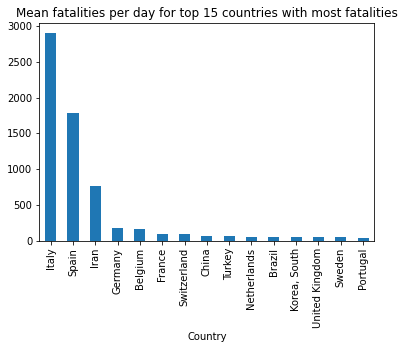

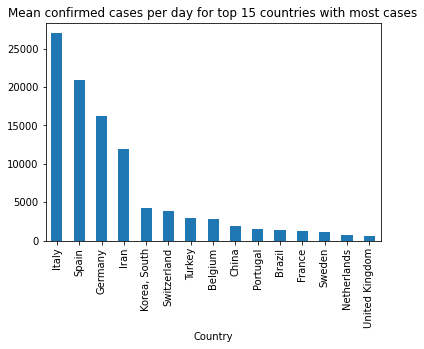

In [18]:
df.sort_values(by=['Fatalities'], inplace=True,ascending=False)
df = df[:15]
df['Fatalities'].plot(kind='bar')
plt.title('Mean fatalities per day for top 15 countries with most fatalities')
plt.show()

df.sort_values(by=['ConfirmedCases'], inplace=True,ascending=False)
df = df[:15]
df['ConfirmedCases'].plot(kind='bar')
plt.title('Mean confirmed cases per day for top 15 countries with most cases')
plt.show()

# These graphs below show the disparity in the available data

##### From given data we can infer that we have data  for each country  for 77 days

In [19]:
df2 = train.groupby(['Country']).sum().drop(['Id'],axis=1)  
df2.tail(12)

# We now have the TOTAL confirmed cases and fatalities for a country.

,ConfirmedCases,Fatalities
Country,,
US,3222547.0,77343.0
Uganda,552.0,0.0
Ukraine,11141.0,310.0
United Arab Emirates,16636.0,100.0
United Kingdom,467602.0,38835.0
Uruguay,5417.0,36.0
Uzbekistan,3260.0,23.0
Venezuela,2382.0,54.0
Vietnam,4593.0,0.0


In [20]:
print("No. of countries in data: ", len(df2)) 
print('----------------------')
print(df2.mean())      # The AVG number of total confirmed cases and fatalities in a country
print('-----------------------')
print(df2.max())      # The MAX number of confirmed cases and fatalities in any country
print('-----------------------')
print(df2.sum())      # The TOTAL number of confirmed cases and fatalities 

No. of countries in data:  180
----------------------
ConfirmedCases    104893.216667
Fatalities          4904.511111
dtype: float64
-----------------------
ConfirmedCases    4764627.0
Fatalities         223179.0
dtype: float64
-----------------------
ConfirmedCases    18880779.0
Fatalities          882812.0
dtype: float64


In [21]:
df2.sort_values(by=['Fatalities'], inplace=True,ascending=False)
df2[:5]

# Top 5 countries with most deaths recorded

,ConfirmedCases,Fatalities
Country,,
Italy,2078445.0,223179.0
China,4764627.0,169091.0
Spain,1614510.0,137486.0
US,3222547.0,77343.0
France,987338.0,72246.0


In [22]:
df2.sort_values(by=['ConfirmedCases'], inplace=True,ascending=False)
df2[:26]
# Countries with confirmed cases >50000

,ConfirmedCases,Fatalities
Country,,
China,4764627.0,169091.0
US,3222547.0,77343.0
Italy,2078445.0,223179.0
Spain,1614510.0,137486.0
Germany,1249835.0,14032.0
France,987338.0,72246.0
Iran,915866.0,58527.0
United Kingdom,467602.0,38835.0
"Korea, South",328015.0,3935.0


In [0]:
df2 = train.groupby(['Country']).sum().drop(['Id'],axis=1)  
# So that we get names of countries in alphabetical order

In [24]:
count1=0
count2=0
v = []    # Index of Countries with more than 100000 confirmed cases
w = []    # Index of Countries with more than 5000 fatalities
x = []  
y = []
for i in range(len(df2)):
    if int(df2[i:i+1]['ConfirmedCases']) >=100000:
      count1+=1
      v.append(i)
      x.append(int(df2[i:i+1]['ConfirmedCases']))       # Actually hold count of no of cases in that country
    
    if int(df2[i:i+1]['Fatalities']) >=5000:
      count2+=1
      w.append(i)
      y.append(int(df2[i:i+1]['Fatalities']))           # Actually hold count of no of deaths in that country

print(count1,' countries have recorded more than 100,000 cases and ',count2,'countries have recorded more than 5k deaths')

a = np.unique(train['Country'])           # We get access to any country in dictionary format (by just their index)
cc = []
f = []
for i in v:
    cc.append(a[i])

for i in w:
    f.append(a[i])

17  countries have recorded more than 100,000 cases and  11 countries have recorded more than 5k deaths


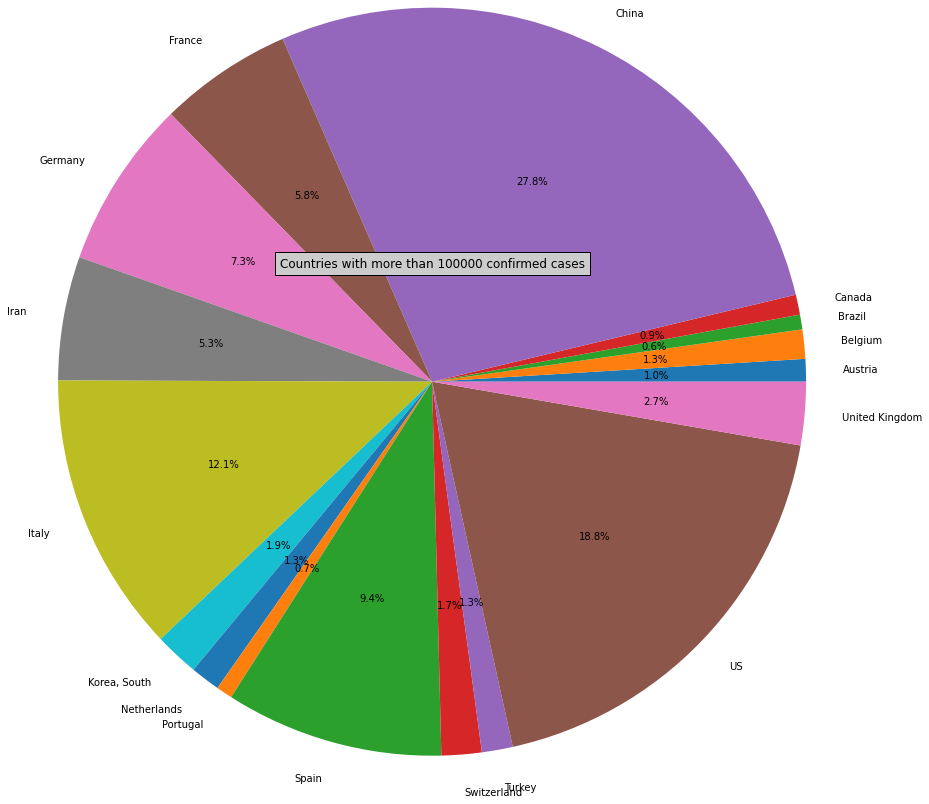

In [25]:
inputs = x
labels = cc
plt.pie(inputs,labels = labels,radius=4.3,autopct='%.1f%%')
plt.title('Countries with more than 100000 confirmed cases', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

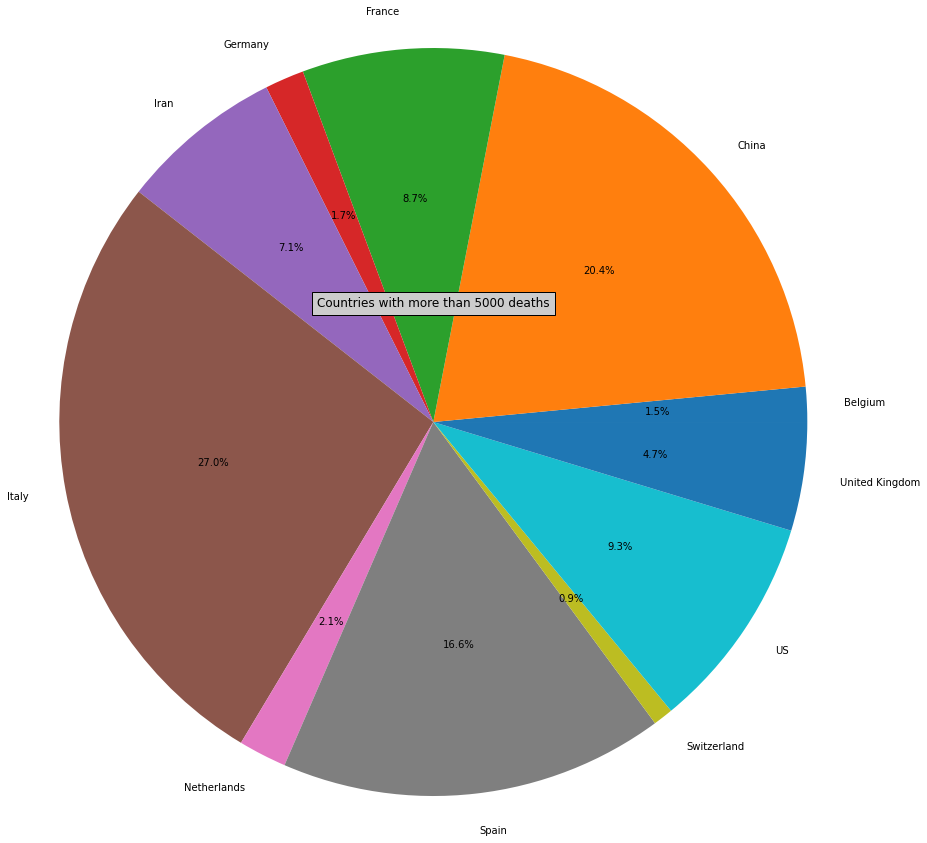

In [26]:
inputs = y
labels = f
plt.pie(inputs,labels = labels,radius=4.3,autopct='%.1f%%')
plt.title('Countries with more than 5000 deaths', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Let's try to analyse which *continents* have been affected the most by the virus in terms of no of Covid-19 cases - 


In [0]:
df2.sort_values(by=['ConfirmedCases'], inplace=True,ascending=False)

Oceania = []
Asia = []
North_America = []
South_America = []
Europe = []
Africa = []

Europe.extend(['Italy','Spain','United Kingdom','France','Belgium','Switzerland','Portugal','Turkey','Austria','Germany','Netherlands','Norway','Sweden','Denmark','Czechia','Ireland'])
North_America.extend(['US','Canada'])
South_America.append('Brazil')
Asia.extend(['Iran','China','Korea, South','Israel','Malaysia','Japan'])
Oceania.append('Australia')

# Finding counts - c1 -Europe, c2 - North America, c3 -South America, c4 -Asia, c5-Oceania

# Mapping countries with >= 50k cases to respective continents
c1,c2,c3,c4,c5 = [0]*5
c1+=int(df2[2:3]['ConfirmedCases'])+int(df2[3:4]['ConfirmedCases'])+int(df2[4:5]['ConfirmedCases'])+int(df2[5:6]['ConfirmedCases'])+int(df2[9:10]['ConfirmedCases'])
+int(df2[7:8]['ConfirmedCases'])+int(df2[10:11]['ConfirmedCases'])+int(df2[11:12]['ConfirmedCases'])+int(df2[12:13]['ConfirmedCases'])+int(df2[13:14]['ConfirmedCases'])
+int(df2[15:16]['ConfirmedCases'])+int(df2[17:18]['ConfirmedCases'])+int(df2[18:19]['ConfirmedCases'])+int(df2[21:22]['ConfirmedCases'])+int(df2[22:23]['ConfirmedCases'])
+int(df2[23:24]['ConfirmedCases'])

c2+=int(df2[1:2]['ConfirmedCases'])+int(df2[14:15]['ConfirmedCases'])
c3+=int(df2[16:17]['ConfirmedCases'])
c4+=int(df2[0:1]['ConfirmedCases'])+int(df2[6:7]['ConfirmedCases'])+int(df2[8:9]['ConfirmedCases'])+int(df2[19:20]['ConfirmedCases'])+int(df2[24:25]['ConfirmedCases'])
+int(df2[25:26]['ConfirmedCases'])

c5+=int(df2[20:21]['ConfirmedCases'])

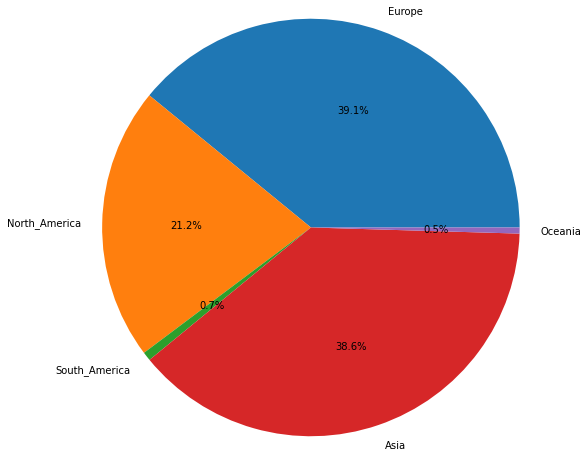

In [28]:
a = [c1,c2,c3,c4,c5]
b = ['Europe','North_America','South_America','Asia','Oceania']
plt.pie(a, labels=b,radius=2.4,autopct='%.1f%%')
plt.show()

# Continent-wise confirmed cases (for countries with over 50k cases)
# This can be approximated very well for entire world (as other countries
# have significantly less cases hence don't make much of an impact on the graph)

Uptill April, as per the data is is clear that majority of the cases have occurred in **Asia**, **Europe** followed by **North America**. 

This gives us an insight as to which regions on the globe have been adversely affected by Covid-19. Remaining regions are still well-off maybe because -


1.   People there have better immunity (maybe due to exercise, better diet)
2.   Climate in those regions is not conducive for virus
3.   Better measures taken by govt such as stricter lockdown, avoid letting people come into a country or leave from a country. Same holds for states as well. Perhaps even the people are more self-aware and conscious.

4.   Healthcare system in those regions is top-notch.



In [29]:
# Now we create another very useful column which gives a good measure of the extent of
# damage CoronaVirus has had in a country - Deaths per Million

df2['Deaths per Million'] = df2.apply(lambda x:x.Fatalities/ x.ConfirmedCases * 1000000, axis=1)

df2.sort_values(by=['ConfirmedCases'], inplace=True,ascending=False)
df2 = df2[:17]                                                          
df2.sort_values(by=['Deaths per Million'], inplace=True,ascending=False)
df2.head()

# basically, for countries with more than 100,000 cases, I have sorted 
# their list in D.O by Deaths per Million

,ConfirmedCases,Fatalities,Deaths per Million
Country,,,
Italy,2078445.0,223179.0,107377.871438
Spain,1614510.0,137486.0,85156.487108
United Kingdom,467602.0,38835.0,83051.398411
Netherlands,219626.0,17252.0,78551.719742
France,987338.0,72246.0,73172.510326


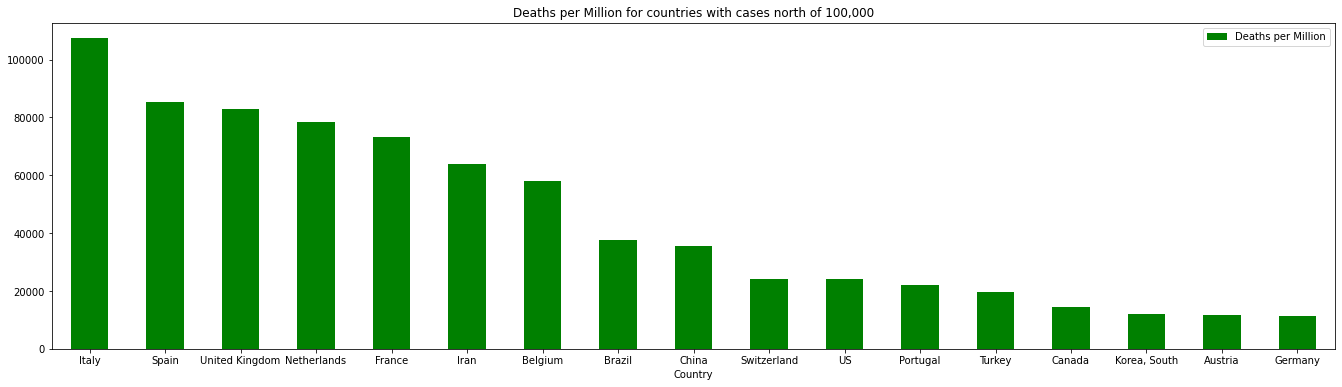

In [30]:
df2.plot(y='Deaths per Million',figsize = (23,6), kind='bar',color = 'green')
plt.title('Deaths per Million for countries with cases north of 100,000')
plt.xticks(rotation=0)
plt.show()

Finally, lets see how 10 most affected countries have fared over the past 2-3 months !

In [31]:
list_countries = ['China','US','Italy','Spain','Germany','France','Iran','United Kingdom','Korea, South','Switzerland','India']
# These are the 10 countries with most confirmed cases

var = train.groupby(['Date','Country'])['ConfirmedCases'].sum().reset_index().set_index('Date')
var2 = var[var['Country'].isin(list_countries)]   # We only want those countries that are in our list

var.head(2)


,Country,ConfirmedCases
Date,,
2020-01-22,Afghanistan,0.0
2020-01-22,Albania,0.0


In [32]:
var2.head(2)



,Country,ConfirmedCases
Date,,
2020-01-22,China,548.0
2020-01-22,France,0.0


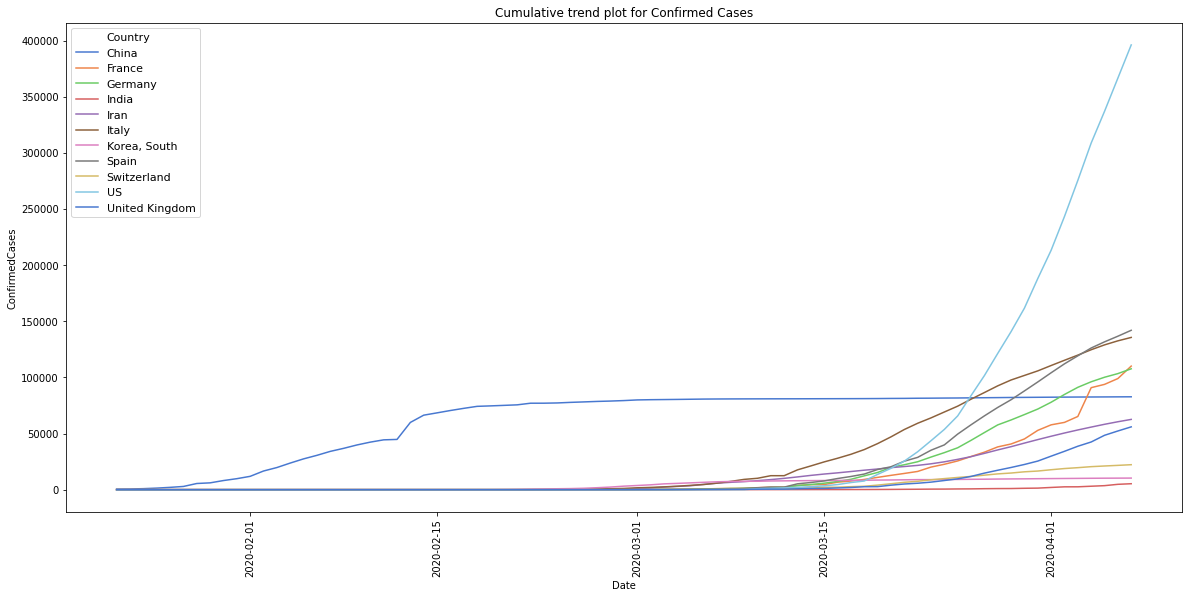

In [33]:
plt.figure(figsize=(20,9))
ax = sns.lineplot(x=var2.index, y="ConfirmedCases", hue="Country", data=var2 ,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 11})
plt.title('Cumulative trend plot for Confirmed Cases')
plt.xticks(rotation=90);

Some inferences - 
1. China has stabilized its new case reporting while all other countries are showing increase in this trend.

2. In case of South Korea, their data indicates that , they realized and understood the pattern quite soon enough, and been able to cap increasing trend. This is also due to the fact that they also had encountered SARS epidemic recently - as a result, they were both physically and mentally prepared when Covid-19 struck, knowing very well what to do.
It seems, from what is called **contact tracing** , they were able to figure their way out of this morass.

3. India has very low number of confirmed reports till 02 April 2020 but it has seen sudden increase in number of confirmed cases since 15 March 2020. Actual rise of cases in India only began in May.

Apart from what I have done, we could also study some of the most affected countries individually. 

#### Some month wise analysis  -

In [34]:
train.loc[:, 'Date'] = train.Date.dt.strftime("%m%d")      
test.loc[:, 'Date'] = test.Date.dt.strftime("%m%d")   

# Converting Date datatype to object(string) with just month and date

# Look at how the date looks now :), much easier to work with
df = train['Date']
df.tail()                     # Note that dtype:object --> string

23557    0403
23558    0404
23559    0405
23560    0406
23561    0407
Name: Date, dtype: object

In [0]:
x1,y1,z1,a1 = [0] *4
x2,y2,z2,a2 = [0] *4
for i in range(len(df)):
  if(df[i][1]=='1'):                                            # Jan
    x1+=int(train[i:i+1]['ConfirmedCases'])
    x2+=int(train[i:i+1]['Fatalities'])

  elif(df[i][1]=='2'):                                          # Feb
    y1+=int(train[i:i+1]['ConfirmedCases'])
    y2+=int(train[i:i+1]['Fatalities'])

  elif(df[i][1]=='3'):                                          # Mar
    z1+=int(train[i:i+1]['ConfirmedCases'])
    z2+=int(train[i:i+1]['Fatalities'])
  
  elif(df[i][1]=='4'):                                          # Apr
    a1+=int(train[i:i+1]['ConfirmedCases'])
    a2+=int(train[i:i+1]['Fatalities'])


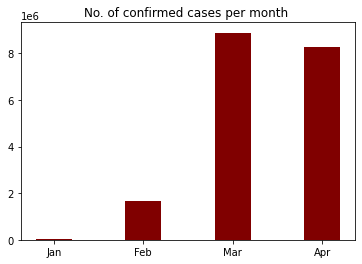

In [36]:
Y = [x1,y1,z1,a1]
X = ['Jan','Feb','Mar','Apr']
plt.bar(X,Y,color='maroon',width=0.4)
plt.title("No. of confirmed cases per month ")
plt.show()


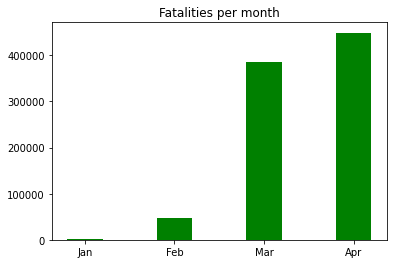

In [37]:
Y1 = [x2,y2,z2,a2]
X = ['Jan','Feb','Mar','Apr']
plt.bar(X,Y1,color='green',width=0.4)
plt.title("Fatalities per month")
plt.show()

### Encoding data ( Converting each value in a column to a number)




In [38]:
# creating instance of labelencoder - Afghanistan (0) -> Zimbabwe (179)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train['Country'] = labelencoder.fit_transform(train['Country'])
test['Country'] = labelencoder.transform(test['Country'])
train.tail()

# NOTE: Actually, countries should be OHE, instead of Label Encoder as
# we don't want the model to learn a dependency that Zimbabwe>US>UK>...Afghanistan
# (corresponding to their numbers).
# For simplicity purposes, I have label encoded them, otherwise we would end up with
# more tha 180 columns in the training & testing dataset 

,Id,State,Country,Date,ConfirmedCases,Fatalities
23557,32708,Zimbabwe,179,0403,9.0,1.0
23558,32709,Zimbabwe,179,0404,9.0,1.0
23559,32710,Zimbabwe,179,0405,9.0,1.0
23560,32711,Zimbabwe,179,0406,10.0,1.0
23561,32712,Zimbabwe,179,0407,11.0,2.0


In [39]:
test.head()

,ForecastId,State,Country,Date
0,1,Afghanistan,0,0326
1,2,Afghanistan,0,0327
2,3,Afghanistan,0,0328
3,4,Afghanistan,0,0329
4,5,Afghanistan,0,0330


In [40]:
# Extracting the things to be predicted.

train_y1 = train['ConfirmedCases']
train_y2 = train['Fatalities']
train = train.drop(['ConfirmedCases','Fatalities','Id','State'],axis=1)     # Id is useless
test = test.drop(['ForecastId','State'],axis=1)     # Id is useless
train.head()

# We also need to find a decent way to represent Date such that
# model can make valuable inferences from it

,Country,Date
0,0,0122
1,0,0123
2,0,0124
3,0,0125
4,0,0126


In [41]:
# Lets change datatype of Date from string to int so that it can be fed to the model

# This seems reasonable as greater the number, more recent is the day

train['Date'] = train['Date'].astype(int)
test['Date'] = test['Date'].astype(int)
train.head()


,Country,Date
0,0,122
1,0,123
2,0,124
3,0,125
4,0,126


**Note:**  This input to a model, is one that I made just for show. Obviously it can be used, but there are much better ways to create an input for a model.

After this, we can proceed with creating our model to predict confirmed cases and fatalities, if we feel so. Else, we could augment and tune our dataset to a much better distribution (more uniform) by various techniques such as `augmentation`, `standardization`, etc.